# Gradient Descent Variations Example

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from gradient_descent import GradientDescent

In [2]:
# Generate sample data
X, y = make_regression(n_samples=1000, n_features=1, noise=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Add bias term
X_train_scaled = np.c_[np.ones(X_train_scaled.shape[0]), X_train_scaled]
X_test_scaled = np.c_[np.ones(X_test_scaled.shape[0]), X_test_scaled]

Batch Gradient Descent MSE: 107.8979
Stochastic Gradient Descent MSE: 110.0928
Mini_batch Gradient Descent MSE: 108.0460


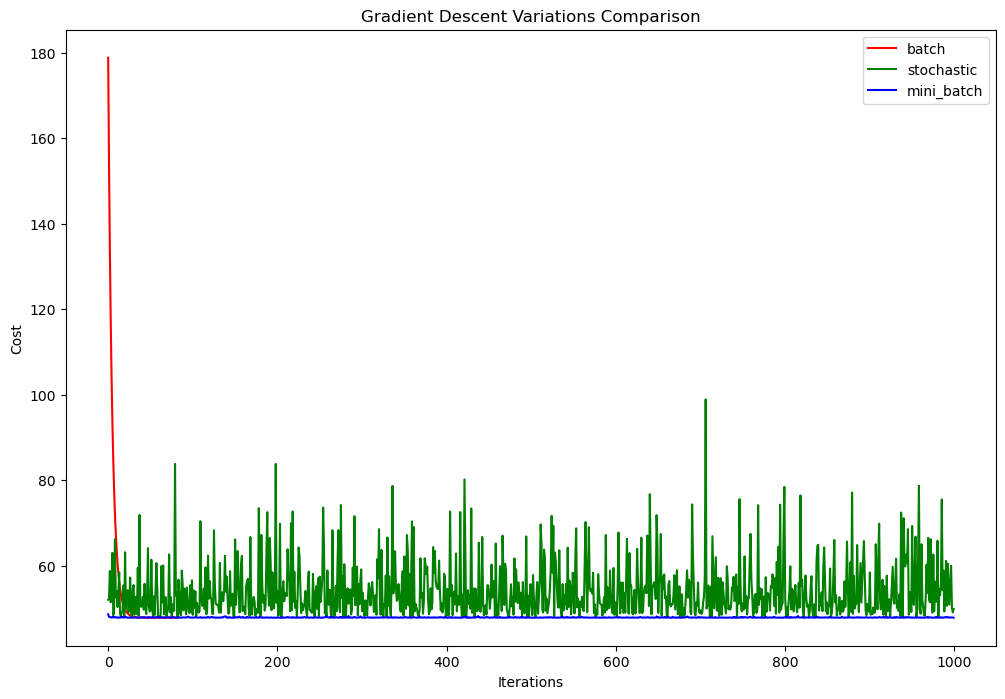

In [3]:
# Compare different gradient descent methods
methods = ['batch', 'stochastic', 'mini_batch']
colors = ['r', 'g', 'b']

plt.figure(figsize=(12, 8))

for method, color in zip(methods, colors):
    gd = GradientDescent(learning_rate=0.1, max_iterations=1000)
    theta, cost_history = gd.fit(X_train_scaled, y_train, method=method)
    
    plt.plot(range(len(cost_history)), cost_history, color=color, label=method)
    
    y_pred = gd.predict(X_test_scaled)
    mse = np.mean((y_test - y_pred) ** 2)
    print(f"{method.capitalize()} Gradient Descent MSE: {mse:.4f}")

plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Gradient Descent Variations Comparison')
plt.legend()
plt.show()

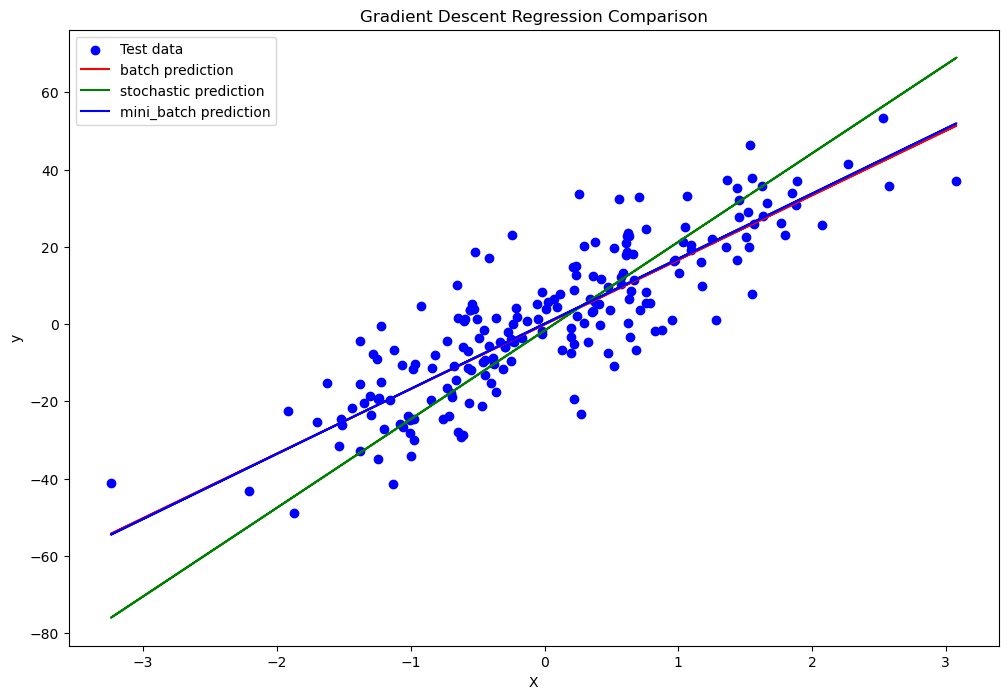

In [4]:
# Visualize the regression results
plt.figure(figsize=(12, 8))
plt.scatter(X_test, y_test, color='b', label='Test data')

for method, color in zip(methods, colors):
    gd = GradientDescent(learning_rate=0.1, max_iterations=1000)
    theta, _ = gd.fit(X_train_scaled, y_train, method=method)
    y_pred = gd.predict(X_test_scaled)
    
    plt.plot(X_test, y_pred, color=color, label=f'{method} prediction')

plt.xlabel('X')
plt.ylabel('y')
plt.title('Gradient Descent Regression Comparison')
plt.legend()
plt.show()

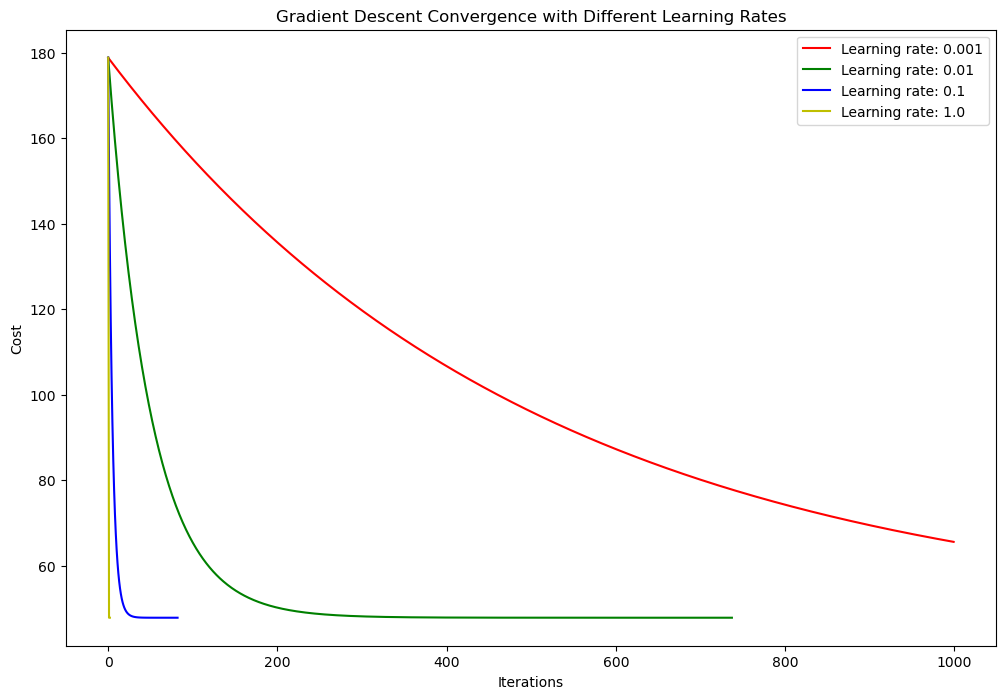

In [5]:
# Compare convergence speed with different learning rates
learning_rates = [0.001, 0.01, 0.1, 1.0]
colors = ['r', 'g', 'b', 'y']

plt.figure(figsize=(12, 8))

for lr, color in zip(learning_rates, colors):
    gd = GradientDescent(learning_rate=lr, max_iterations=1000)
    _, cost_history = gd.fit(X_train_scaled, y_train, method='batch')
    
    plt.plot(range(len(cost_history)), cost_history, color=color, label=f'Learning rate: {lr}')

plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Gradient Descent Convergence with Different Learning Rates')
plt.legend()
plt.show()